In [1]:
import numpy as np
from svm_classifier import svm, svm_angular
from knn_classifier import k_nn
from time import time
import pandas as pd
from ctypes import *
import sys
from math import sqrt as sqrt
from numpy.ctypeslib import ndpointer 

lib = cdll.LoadLibrary("./lib_naive_.so")


class cross_validation_result(Structure):
    _fields_ = [    ("avg_accuracy", c_float),
                    ("min_accuracy", c_float),
                    ("max_accuracy", c_float),
                    ("accuracy_variance", c_float) ]
    def __init__(self):
        self.avg_accuracy = self.accuracy_variance = 0;
        self.min_accuracy = sys.float_info.max;
        self.max_accuracy = sys.float_info.min;
    
    def print_scores(self):
        print( "==========================================================" + "\n" 
                + "Naive bayes classification: " + "\n" 
                + "Minimum Accuracy: " + str(self.min_accuracy) + "\n"
                + "Average Accuracy: " + str(self.avg_accuracy) + "\n"
                + "Maximum Accuracy: " + str(self.max_accuracy) + "\n"
                + "Variance of Accuracy: " + str(self.accuracy_variance) + "\n"
                + "Standard Deviation of Accuracy: " + str(sqrt(self.accuracy_variance)) + "\n" 
                + "=========================================================="
        )



# Load spambase dataset
file_name = "spambase.data"
data = open(file_name, "r")
mailData = np.loadtxt(data, delimiter=",")
np.random.shuffle(mailData)


# MAIN:



# py_main = lib.py_main 
# py_main.argtypes = [(c_float * mailData.shape[0]) * mailData.shape[1]] 

# c_mail_data = np.array(mailData, dtype=np.float32)
# lib.py_main.restype = cross_validation_result
# start = time()
# naive_bayes_score = lib.py_main()
# end = time()
# naive_bayes_time = end - start


lib.py_main.restype = cross_validation_result
start = time()
naive_bayes_score = lib.py_main()
end = time()
naive_bayes_time = end - start

# naive_bayes_score.print_scores()

start = time()
linear_score, poly_score, rbf_score = svm(mailData)
end = time()
svm_time = end - start
# print("\nTime elapsed for SVM: {}".format(end - start))

start = time()
linear_norm_score, poly_norm_score, rbf_norm_score = svm_angular(mailData)
end = time()
svm_norm_time = end - start
# print("\nTime elapsed for SVM Angular: {}".format(end - start))

start = time()
knn_score = k_nn(mailData)
end = time()
knn_time = end - start
# print("\nTime elapsed for K-NN: {}".format(end - start))


minimum_accuracy = [
    linear_score.min() * 100,
    poly_score.min() * 100,
    rbf_score.min() * 100,
    linear_norm_score.min() * 100,
    poly_norm_score.min() * 100,
    rbf_norm_score.min() * 100,
    knn_score.min() * 100,
    naive_bayes_score.min_accuracy * 100 
]
average_accuracy = [
    linear_score.mean() * 100,
    poly_score.mean() * 100,
    rbf_score.mean() * 100,
    linear_norm_score.mean() * 100,
    poly_norm_score.mean() * 100,
    rbf_norm_score.mean() * 100,
    knn_score.mean() * 100,
    naive_bayes_score.avg_accuracy * 100
]
maximum_accuracy = [
    linear_score.max() * 100,
    poly_score.max() * 100,
    rbf_score.max() * 100,
    linear_norm_score.max() * 100,
    poly_norm_score.max() * 100,
    rbf_norm_score.max() * 100,
    knn_score.max() * 100,
    naive_bayes_score.max_accuracy * 100 
]
elapsed_time = [
    str(round(svm_time, 4)) + " (For all SVMs)",
    str(round(svm_time, 4)) + " (For all SVMs)",
    str(round(svm_time, 4)) + " (For all SVMs)",
    str(round(svm_norm_time, 4)) + " (For all Norm SVMs)",
    str(round(svm_norm_time, 4)) + " (For all Norm SVMs)",
    str(round(svm_norm_time, 4)) + " (For all Norm SVMs)",
    str(round(knn_time, 4)),
    str(round(naive_bayes_time, 4))
]
variance_of_accuracy= [
    linear_score.var(),
    poly_score.var(),
    rbf_score.var(),
    linear_norm_score.var(),
    poly_norm_score.var(),
    rbf_norm_score.var(),
    knn_score.var(),
    naive_bayes_score.accuracy_variance]
std_of_accuracy = [linear_score.std(),
    poly_score.std(),
    rbf_score.std(),
    linear_norm_score.std(),
    poly_norm_score.std(),
    rbf_norm_score.std(),
    knn_score.std(),
    sqrt(naive_bayes_score.accuracy_variance)]
index = [
    "Linear SVM",
    "2-degree Poly SVM",
    "RBF SVM",
    "Linear Norm SVM",
    "2-degree Poly Norm SVM",
    "RBF Norm SVM",
    "KNN",
    "NAIVE BAYES"
]
dfTable = pd.DataFrame(
    {
        "Minimum Accuracy": minimum_accuracy,
        "Average Accuracy": average_accuracy,
        "Maximum Accuracy": maximum_accuracy,
        "Variance of Accuracy": variance_of_accuracy,
        "Standard deviation of Accuracy": std_of_accuracy,
        "elapsed_time": elapsed_time
    },
    index=index
)

dfTable



,Minimum Accuracy,Average Accuracy,Maximum Accuracy,Variance of Accuracy,Standard deviation of Accuracy,elapsed_time
Linear SVM,60.434783,60.812789,61.171367,0.000005,0.002305,12.1901 (For all SVMs)
2-degree Poly SVM,77.173913,81.112562,82.608696,0.000305,0.017455,12.1901 (For all SVMs)
RBF SVM,89.782609,92.241017,94.130435,0.000112,0.010591,12.1901 (For all SVMs)
Linear Norm SVM,90.000000,92.566632,93.913043,0.000142,0.011910,5.3004 (For all Norm SVMs)
2-degree Poly Norm SVM,91.739130,93.805385,95.227766,0.000091,0.009553,5.3004 (For all Norm SVMs)
RBF Norm SVM,91.304348,93.957512,95.444685,0.000118,0.010874,5.3004 (For all Norm SVMs)
KNN,89.782609,91.154343,93.260870,0.000092,0.009601,0.633
NAIVE BAYES,82.788670,84.535187,87.145972,0.001720,0.041473,0.0461


Now follows the graphical comparison:

(0.0, 100.0)

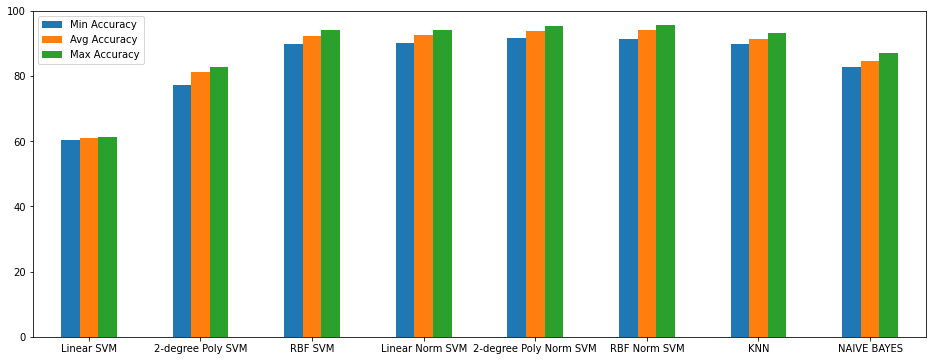

In [2]:
minimum_accuracy = [
    linear_score.min() * 100,
    poly_score.min() * 100,
    rbf_score.min() * 100,
    linear_norm_score.min() * 100,
    poly_norm_score.min() * 100,
    rbf_norm_score.min() * 100,
    knn_score.min() * 100,
    naive_bayes_score.min_accuracy * 100 
]
average_accuracy = [
    linear_score.mean() * 100,
    poly_score.mean() * 100,
    rbf_score.mean() * 100,
    linear_norm_score.mean() * 100,
    poly_norm_score.mean() * 100,
    rbf_norm_score.mean() * 100,
    knn_score.mean() * 100,
    naive_bayes_score.avg_accuracy * 100
]
maximum_accuracy = [
    linear_score.max() * 100,
    poly_score.max() * 100,
    rbf_score.max() * 100,
    linear_norm_score.max() * 100,
    poly_norm_score.max() * 100,
    rbf_norm_score.max() * 100,
    knn_score.max() * 100,
    naive_bayes_score.max_accuracy * 100 
]
index = [
    "Linear SVM",
    "2-degree Poly SVM",
    "RBF SVM",
    "Linear Norm SVM",
    "2-degree Poly Norm SVM",
    "RBF Norm SVM",
    "KNN",
    "NAIVE BAYES"
]
df = pd.DataFrame(
    {
        "Min Accuracy": minimum_accuracy,
        "Avg Accuracy": average_accuracy,
        "Max Accuracy": maximum_accuracy,
    },
    index=index
)


ax = df.plot.bar(rot=0, figsize=(18,6))
ax.set_ylim(0, 100)